<a href="https://colab.research.google.com/github/Zayoco/SIS-420-IA/blob/main/(1ER%20PARCIAL)_AVOCADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#conectamos con Google drive para subir el dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Implementar librerias
import os
#computacion vectorial y cientifica
import numpy as np
#libreria para graficar
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D #Para graficar elementos 3D

#llama a mtplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [3]:
#mostramos los datos con panda ¿por que no? si se ve bonito
import pandas as pd
from datetime import datetime

In [4]:
#cargamos dataset
data = pd.read_csv('/content/drive/MyDrive/DATASETS/avocado.csv')

In [5]:
print(data)

       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
#Eliminamos alguna columnas para una mejor convergencia
data.drop('Unnamed: 0', axis=1, inplace = True)

data.drop('Date', axis=1, inplace = True)

data.drop('type', axis=1, inplace = True)

data.drop('year', axis=1, inplace = True)

data.drop('region', axis=1, inplace = True)

In [8]:
#Lectura de datos
X = data.iloc[:, 1:9]
y = data.iloc[:, 0]
m = y.size

In [10]:
print(X)
print('-'*25)
print(y)

       Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  
0           93.25          0.0  
1           97.49          0.0  


In [11]:
#Normalizamos
def featureNormalize(X):
  X_norm = X.copy()
  mu = np.zeros(X.shape[1])
  sigma = np.zeros(X.shape[1])

  mu = np.mean(X, axis = 0)
  sigma = np.std(X, axis = 0)
  X_norm = (X - mu) / sigma

  return X_norm, mu, sigma

In [12]:
#Llamamos a featureNormalize con los datos ya cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media Calculada :', mu)
print('Desviación estandar calculada :', sigma)
print(X_norm)

       Total Volume     4046       4225    4770  Total Bags  Small Bags  \
0          64236.62  1036.74   54454.85   48.16     8696.87     8603.62   
1          54876.98   674.28   44638.81   58.33     9505.56     9408.07   
2         118220.22   794.70  109149.67  130.50     8145.35     8042.21   
3          78992.15  1132.00   71976.41   72.58     5811.16     5677.40   
4          51039.60   941.48   43838.39   75.78     6183.95     5986.26   
...             ...      ...        ...     ...         ...         ...   
18244      17074.83  2046.96    1529.20    0.00    13498.67    13066.82   
18245      13888.04  1191.70    3431.50    0.00     9264.84     8940.04   
18246      13766.76  1191.92    2452.79  727.94     9394.11     9351.80   
18247      16205.22  1527.63    2981.04  727.01    10969.54    10919.54   
18248      17489.58  2894.77    2356.13  224.53    12014.15    11988.14   

       Large Bags  XLarge Bags  
0           93.25          0.0  
1           97.49          0.0  


In [15]:
#Añade intersección a x
#(Columnas de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis = 1)

In [16]:
#aplicamos la funcion de costo
def chance_admit(X, y, theta):
  #Inicializamos valores
  m = y.shape[0] #numero de ejemplos de entrenamiento

  J = 0
  h = np.dot(X, theta)
  J = (1/(2 * m))*np.sum(np.square(np.dot(X, theta)-y))
  return J

In [17]:
#calculamos el desenso por el gradiente
def gradienteDescentMulti(X, y, theta,alpha, num_iters):
  #Inicializamos valores
  m = y.shape[0] #numero de ejemplos de entrenamiento
   #realizamos una copia de tehta el cual sera actualizado por el descenso de la gradiente
  theta = theta.copy()
  J_history = []
  for i in range(num_iters):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_history.append(chance_admit(X, y, theta))

  return theta, J_history

In [26]:
print(data)

       AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  
0         8603.62       93.25 

theta calculado por el descenso de la gradiente: [ 1.40597799 -0.01644762 -0.09190862  0.04912498 -0.03757374  0.00440014
  0.01320248 -0.02433911  0.02408404]
El precio estimado de una Palta con estas caracteristicas es de: 1.4267


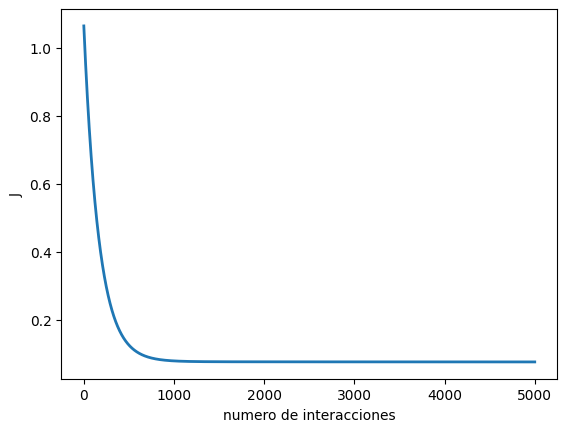

In [29]:
#Elegimos algun valor para alpha
alpha = 0.003
num_iters = 5000

#Iniciamos theta e inicializamos el descenso de las gradientes
theta = np.zeros(9)
theta, J_history = gradienteDescentMulti(X, y ,theta, alpha, num_iters)

#grafica de la chance de ser admitido
pyplot.plot(np.arange(len(J_history)), J_history, lw = 2)
pyplot.xlabel('numero de interacciones')
pyplot.ylabel('J')

#Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso de la gradiente: {:s}'.format(str(theta)))

#estimamos el precio
X_array = [1, 78992.15, 1132.00, 71976.41, 72.58, 5811.16, 5677.40, 133.76, 0.0]
X_array[1: 9] = (X_array[1:9]- mu)/ sigma
chance = np.dot(X_array, theta)

print('El precio estimado de una Palta con estas caracteristicas es de: {:.4f}'.format(chance))